In [1]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
import sys
print(sys.version)


3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [3]:
print("hello world")

hello world


In [20]:
import tensorflow as tf


In [21]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [23]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
# Dividing the Dataset
x = dataset.iloc[ : , 3:13]
y = dataset.iloc[: , 13 ]

In [25]:
x.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [26]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [27]:
x['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [28]:
## Feature Engineering
geography = pd.get_dummies(x['Geography'] , drop_first = True)
gender = pd.get_dummies(x['Gender'] , drop_first = True)

In [29]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [30]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [31]:
## concatenate these varuiables with dataframe

In [32]:
x = x.drop(['Geography' , 'Gender' ], axis = 1)

In [33]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [34]:
x= pd.concat([x , geography , gender],axis =1 )

In [35]:
## Splitting the dataset into train test split

In [36]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [37]:
## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [40]:
x_train.shape

(8000, 11)

In [41]:
## Part  2
## lets create ANN

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU
from tensorflow.keras.layers import Dropout



In [43]:
# Initialising the ANN
classifier = Sequential()

In [44]:
# Adding the input layer and first hidden layer
classifier.add(Dense(units = 11 , activation = 'relu'))
classifier.add(Dropout(0.2))

In [7]:
# Adding the first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(0.2))


In [8]:
# Second hidden layer
classifier.add(Dense(units = 6, activation = 'relu' ))
classifier.add(Dropout(0.3))

In [45]:
classifier.add(Dense(units = 1 , activation = 'sigmoid'))

In [46]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [47]:
classifier.compile(optimizer =opt , loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [48]:
import tensorflow as tf
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [49]:
#ytrain our neural network
model_history = classifier.fit(x_train , y_train , validation_split = 0.33 , batch_size= 10 , epochs = 1000 ,callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 7ms/step - loss: 0.4477 - accuracy: 0.8076 - val_loss: 0.4082 - val_accuracy: 0.8364
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3997 - accuracy: 0.8315 - val_loss: 0.3846 - val_accuracy: 0.8353
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3723 - accuracy: 0.8483 - val_loss: 0.3763 - val_accuracy: 0.8417
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3708 - accuracy: 0.8438 - val_loss: 0.3747 - val_accuracy: 0.8417
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3734 - accuracy: 0.8457 - val_loss: 0.3705 - val_accuracy: 0.8417
Epoch 6/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3671 - accuracy: 0.8487 - val_loss: 0.3659 - val_accuracy: 0.8459
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3729 - accuracy: 0.8453 - val_loss: 0.3655 - val_accuracy:

In [50]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

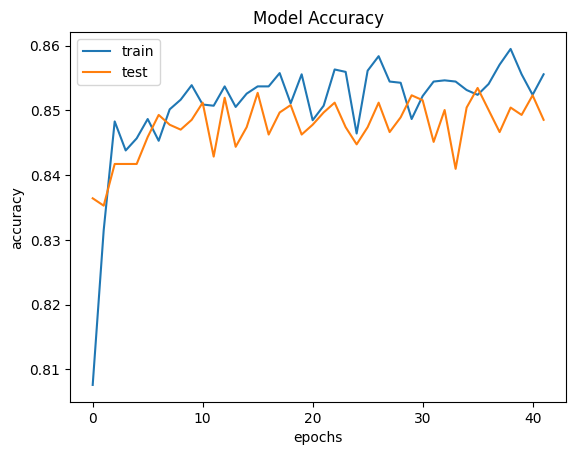

In [53]:
## Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train' , 'test']  , loc = 'upper left')
plt.show()

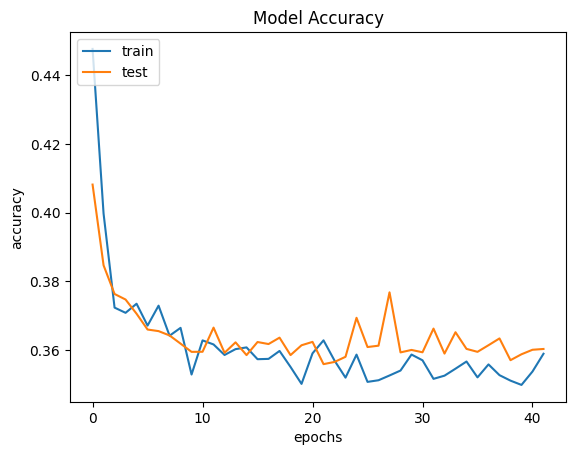

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train' , 'test']  , loc = 'upper left')
plt.show()

In [ ]:
## Part 3 - Making the predictuions and evaluating the data

In [55]:
# predicting the test result
y_pred = classifier.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [56]:
y_pred = (y_pred >= 0.5)

In [57]:
## Make the confusion matrix


In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(y_test , y_pred)

In [60]:
cm

array([[1510,   97],
       [ 198,  195]])

In [61]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred , y_test)

In [62]:
score

0.8525

In [63]:
## get the weigths
classifier.get_weights()

[array([[-0.21247968, -0.0481887 , -0.0128761 , -0.19881257, -0.27525988,
         -0.2457875 ,  0.10662762,  0.04427215,  0.19757558,  0.21448575,
         -0.18037957],
        [ 0.19894777,  2.0041444 ,  1.7427441 , -1.618701  ,  0.6459137 ,
          0.28547418, -1.6905032 ,  0.49758598, -1.6676425 ,  0.36942083,
         -1.7682456 ],
        [ 0.22075522,  0.26706207, -0.18574792, -0.34715396,  0.08009093,
         -0.14265221,  0.01660783,  0.33276084,  0.15711176,  0.501417  ,
         -0.09347544],
        [ 0.7070474 , -0.3850375 ,  0.18273047,  0.2598219 , -1.2776166 ,
          0.9925639 , -0.87369144, -1.8407644 , -0.2648468 , -1.1754256 ,
         -0.5011853 ],
        [ 2.7800968 , -0.02012501, -0.24256891,  0.5748527 , -2.5303528 ,
          2.794623  ,  0.81437695, -2.5459058 ,  0.5426135 ,  0.97112304,
          0.6171263 ],
        [-0.15171568, -0.11260744, -0.04585739,  1.3816711 , -0.12792942,
         -0.25664794, -0.35362715, -0.11339734, -0.1373149 ,  1.0092884